In [1]:
import seaborn as sns

#Set Seaborn Style

sns.set(style="whitegrid")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import training and test dataframes using pandas

df_train = pd.read_csv("path\\to\\train.csv")
df_test = pd.read_csv("path\\to\\test.csv")

In [3]:
#Let's display the heads of both dataframes to make sure they imported correctly
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
# As expected, we see one less variable in the test data. Why? The target variable should only display in the target set.

# Let's take a look at all of the column names without truncation
for column in df_train:
    print(column)

Id
v2a1
hacdor
rooms
hacapo
v14a
refrig
v18q
v18q1
r4h1
r4h2
r4h3
r4m1
r4m2
r4m3
r4t1
r4t2
r4t3
tamhog
tamviv
escolari
rez_esc
hhsize
paredblolad
paredzocalo
paredpreb
pareddes
paredmad
paredzinc
paredfibras
paredother
pisomoscer
pisocemento
pisoother
pisonatur
pisonotiene
pisomadera
techozinc
techoentrepiso
techocane
techootro
cielorazo
abastaguadentro
abastaguafuera
abastaguano
public
planpri
noelec
coopele
sanitario1
sanitario2
sanitario3
sanitario5
sanitario6
energcocinar1
energcocinar2
energcocinar3
energcocinar4
elimbasu1
elimbasu2
elimbasu3
elimbasu4
elimbasu5
elimbasu6
epared1
epared2
epared3
etecho1
etecho2
etecho3
eviv1
eviv2
eviv3
dis
male
female
estadocivil1
estadocivil2
estadocivil3
estadocivil4
estadocivil5
estadocivil6
estadocivil7
parentesco1
parentesco2
parentesco3
parentesco4
parentesco5
parentesco6
parentesco7
parentesco8
parentesco9
parentesco10
parentesco11
parentesco12
idhogar
hogar_nin
hogar_adul
hogar_mayor
hogar_total
dependency
edjefe
edjefa
meaneduc
instlevel

### That's a big list of variables. It'll be tough to remember their meanings. Let's create a reference key:

##### v2a1, Monthly rent payment
##### hacdor, =1 Overcrowding by bedrooms
##### rooms,  number of all rooms in the house
##### hacapo, =1 Overcrowding by rooms
##### v14a, =1 has bathroom in the household
##### refrig, =1 if the household has refrigerator
##### v18q, owns a tablet
##### v18q1, number of tablets household owns
##### r4h1, Males younger than 12 years of age
##### r4h2, Males 12 years of age and older
##### r4h3, Total males in the household
##### r4m1, Females younger than 12 years of age
##### r4m2, Females 12 years of age and older
##### r4m3, Total females in the household
##### r4t1, persons younger than 12 years of age
##### r4t2, persons 12 years of age and older
##### r4t3, Total persons in the household
##### tamhog, size of the household
##### tamviv, number of persons living in the household
##### escolari, years of schooling
##### rez_esc, Years behind in school
##### hhsize, household size
##### paredblolad, =1 if predominant material on the outside wall is block or brick
##### paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
##### paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
##### pareddes, =1 if predominant material on the outside wall is waste material
##### paredmad, =1 if predominant material on the outside wall is wood
##### paredzinc, =1 if predominant material on the outside wall is zink
##### paredfibras, =1 if predominant material on the outside wall is natural fibers
##### paredother, =1 if predominant material on the outside wall is other
##### pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
##### pisocemento, =1 if predominant material on the floor is cement
##### pisoother, =1 if predominant material on the floor is other
##### pisonatur, =1 if predominant material on the floor is  natural material
##### pisonotiene, =1 if no floor at the household
##### pisomadera, =1 if predominant material on the floor is wood
##### techozinc, =1 if predominant material on the roof is metal foil or zink
##### techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
##### techocane, =1 if predominant material on the roof is natural fibers
##### techootro, =1 if predominant material on the roof is other
##### cielorazo, =1 if the house has ceiling
##### abastaguadentro, =1 if water provision inside the dwelling
##### abastaguafuera, =1 if water provision outside the dwelling
##### abastaguano, =1 if no water provision
##### public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
##### planpri, =1 electricity from private plant
##### noelec, =1 no electricity in the dwelling
##### coopele, =1 electricity from cooperative
##### sanitario1, =1 no toilet in the dwelling
##### sanitario2, =1 toilet connected to sewer or cesspool
##### sanitario3, =1 toilet connected to  septic tank
##### sanitario5, =1 toilet connected to black hole or letrine
##### sanitario6, =1 toilet connected to other system
##### energcocinar1, =1 no main source of energy used for cooking (no kitchen)
##### energcocinar2, =1 main source of energy used for cooking electricity
##### energcocinar3, =1 main source of energy used for cooking gas
##### energcocinar4, =1 main source of energy used for cooking wood charcoal
##### elimbasu1, =1 if rubbish disposal mainly by tanker truck
##### elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
##### elimbasu3, =1 if rubbish disposal mainly by burning
##### elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
##### elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
##### elimbasu6, =1 if rubbish disposal mainly other
##### epared1, =1 if walls are bad
##### epared2, =1 if walls are regular
##### epared3, =1 if walls are good
##### etecho1, =1 if roof are bad
##### etecho2, =1 if roof are regular
##### etecho3, =1 if roof are good
##### eviv1, =1 if floor are bad
##### eviv2, =1 if floor are regular
##### eviv3, =1 if floor are good
##### dis, =1 if disable person
##### male, =1 if male
##### female, =1 if female
##### estadocivil1, =1 if less than 10 years old
##### estadocivil2, =1 if free or coupled uunion
##### estadocivil3, =1 if married
##### estadocivil4, =1 if divorced
##### estadocivil5, =1 if separated
##### estadocivil6, =1 if widow/er
##### estadocivil7, =1 if single
##### parentesco1, =1 if household head
##### parentesco2, =1 if spouse/partner
##### parentesco3, =1 if son/doughter
##### parentesco4, =1 if stepson/doughter
##### parentesco5, =1 if son/doughter in law
##### parentesco6, =1 if grandson/doughter
##### parentesco7, =1 if mother/father
##### parentesco8, =1 if father/mother in law
##### parentesco9, =1 if brother/sister
##### parentesco10, =1 if brother/sister in law
##### parentesco11, =1 if other family member
##### parentesco12, =1 if other non family member
##### idhogar, Household level identifier
##### hogar_nin, Number of children 0 to 19 in household
##### hogar_adul, Number of adults in household
##### hogar_mayor, # of individuals 65+ in the household
##### hogar_total, # of total individuals in the household
##### dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
##### edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
##### edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
##### meaneduc,average years of education for adults (18+)
##### instlevel1, =1 no level of education
##### instlevel2, =1 incomplete primary
##### instlevel3, =1 complete primary
##### instlevel4, =1 incomplete academic secondary level
##### instlevel5, =1 complete academic secondary level
##### instlevel6, =1 incomplete technical secondary level
##### instlevel7, =1 complete technical secondary level
##### instlevel8, =1 undergraduate and higher education
##### instlevel9, =1 postgraduate higher education
##### bedrooms, number of bedrooms
##### overcrowding, # persons per room
##### tipovivi1, =1 own and fully paid house
##### tipovivi2, "=1 own,  paying in installments"
##### tipovivi3, =1 rented
##### tipovivi4, =1 precarious
##### tipovivi5, "=1 other(assigned,  borrowed)"
##### computer, =1 if the household has notebook or desktop computer
##### television, =1 if the household has TV
##### mobilephone, =1 if mobile phone
##### qmobilephone, # of mobile phones
##### lugar1, =1 region Central
##### lugar2, =1 region Chorotega
##### lugar3, =1 region PacÃƒÂ­fico central
##### lugar4, =1 region Brunca
##### lugar5, =1 region Huetar AtlÃƒÂ¡ntica
##### lugar6, =1 region Huetar Norte
##### area1, =1 zona urbana
##### area2, =2 zona rural
##### age, Age in years
##### SQBescolari, escolari squared
##### SQBage, age squared
##### SQBhogar_total, hogar_total squared
##### SQBedjefe, edjefe squared
##### SQBhogar_nin, hogar_nin squared
##### SQBovercrowding, overcrowding squared
##### SQBdependency, dependency squared
##### SQBmeaned, square of the mean years of education of adults (>=18) in the household
##### agesq, Age squared

In [6]:
# Frequency Table for non-continuous variables

##Under Contruction

In [7]:
# Summary Statistics

df_train.describe()

#df_train.column_name.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [8]:
# In order to continue, we should understand how many unique households are in the data set vs. the number of individuals
df_train.idhogar.nunique()

2988

In [9]:
# We can see that there are 2,988 households in our training set.
# Let's see how many individuals in are in our  dataset

#Using this method, we can see how many unique Ids are preent in the set. this should reconcile with the shape of the dataset
df_train.Id.nunique()

9557

In [10]:
# Prints the shape of the dataset
print(df_train.shape)

# We confirmed that there are no duplicate Ids

(9557, 143)


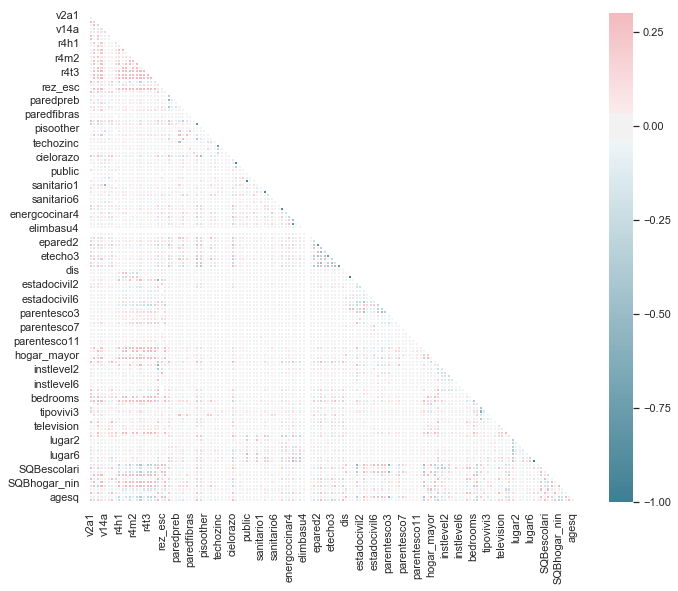

In [11]:
#Correlation plot to get a start
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [12]:
# Sort the Correlations
# I use absolute value because we're looking for strong positive OR negative correlations
c = df_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

#This will print a long list. Oh well, so be it.
pd.options.display.max_rows = 2500

#We are only interested in rows with values that are less than "1" but more than "0" (or NaN)
print(so)

Target           Target             1.000000
instlevel3       instlevel3         1.000000
parentesco6      parentesco6        1.000000
parentesco7      parentesco7        1.000000
parentesco8      parentesco8        1.000000
parentesco9      parentesco9        1.000000
parentesco10     parentesco10       1.000000
parentesco11     parentesco11       1.000000
parentesco12     parentesco12       1.000000
hogar_nin        hogar_nin          1.000000
hogar_adul       hogar_adul         1.000000
hogar_mayor      hogar_mayor        1.000000
hogar_total      tamhog             1.000000
                 hhsize             1.000000
                 hogar_total        1.000000
meaneduc         meaneduc           1.000000
instlevel1       instlevel1         1.000000
parentesco5      parentesco5        1.000000
parentesco4      parentesco4        1.000000
parentesco3      parentesco3        1.000000
estadocivil1     estadocivil1       1.000000
eviv3            eviv3              1.000000
dis       

#### Not only can we see some of the higher correlations, we can also confirm we have redudants of perfectly inverse variables

#### The following exploration will be conducted using the df as a whole. In later sections, I will eliminate household duplicates.

#### For now, if any of the variables are shared throughout the HH, assume that the counts contain duplicates. 

#### It is still important to consider how shared variables are distributed throughout the individuals

# Individual exploration

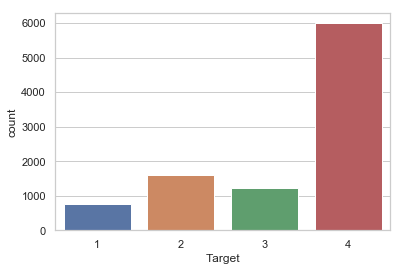

In [13]:
# Bar plots for simple variables that are important

# This plot will visualize the number of individuals in each target group

inc_1 = sns.countplot(x="Target", data = df_train)

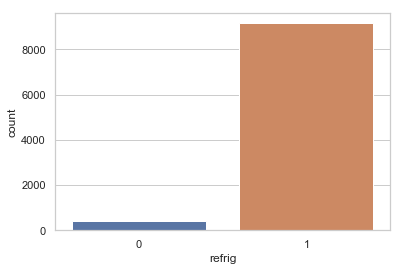

In [14]:
# Refrigertors

ref_1 = sns.countplot(x="refrig", data = df_train)

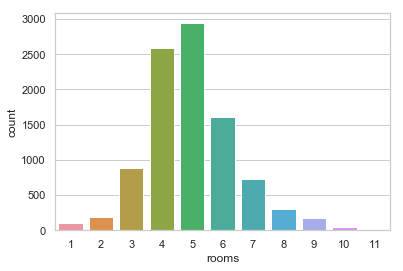

In [15]:
#Rooms

## MAKE A DISTRIBUTION

rom_1 = sns.countplot(x="rooms", data = df_train)

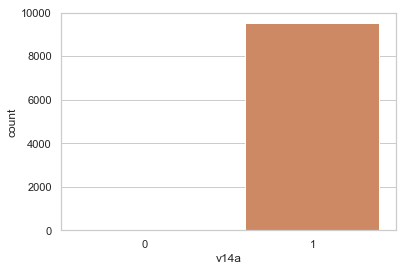

In [16]:
#Has Bathroom
#50 people don't have bathrooms

bat_1 = sns.countplot(x="v14a", data = df_train)

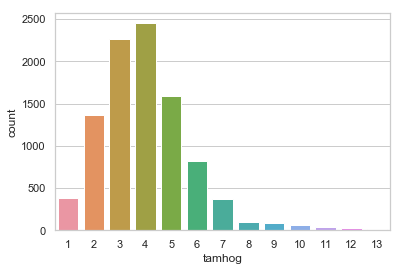

In [17]:
# Size of HH (tamhog)

hhsize_1 = sns.countplot(x="tamhog", data = df_train)

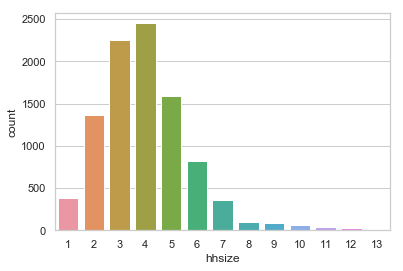

In [18]:
# Size of HH (HHsize)

#This is interesting. I can see no reason why these are distinct variables. Maybe we can remove one of these columns.
hhsize_2 = sns.countplot(x="hhsize", data = df_train)

In [19]:
#Checking to see if those two columns are duplicates

# If this returns a "True" value, these columns are equal
df_train['hhsize'].equals(df_train['tamhog'])

True

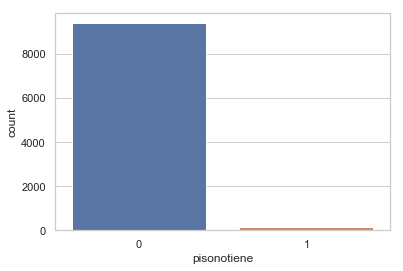

In [20]:
# Presence of a floor in HH

## 1 if no floor

floor_1 = sns.countplot(x="pisonotiene", data = df_train)

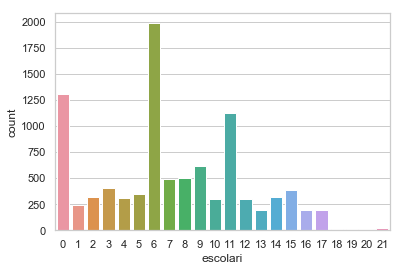

In [21]:
#Years of School

escuela_1 = sns.countplot(x="escolari", data = df_train)

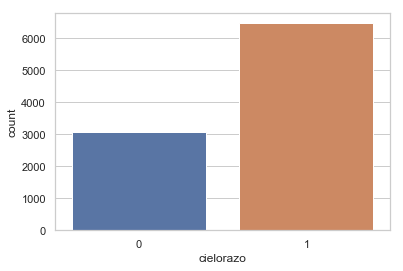

In [22]:
#Ceiling in HH
ceiling_1 = sns.countplot(x="cielorazo", data = df_train)

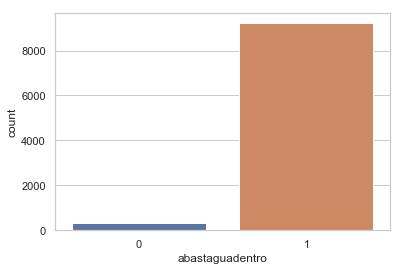

In [23]:
# Presence of water provision to HH

water_1 = sns.countplot(x="abastaguadentro", data = df_train)

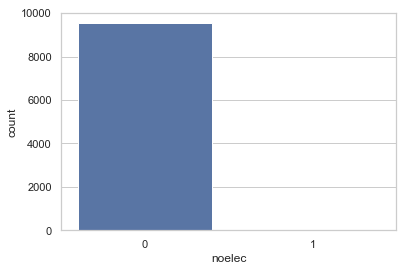

In [24]:
# Presence of electricity provision to HH

elec_1 = sns.countplot(x="noelec", data = df_train)

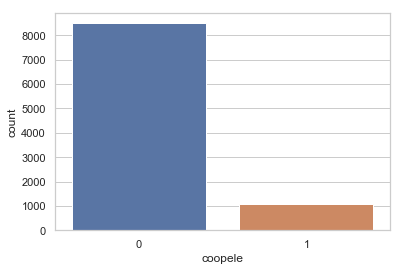

In [25]:
# Does coop provide elec to HH

coelec_1 = sns.countplot(x="coopele", data = df_train)

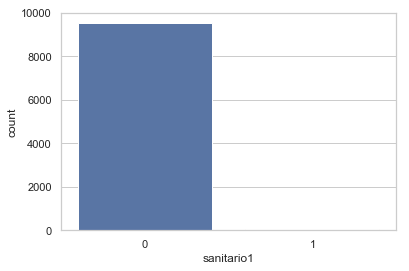

In [26]:
# Presence of toilet in HH

toil_1 = sns.countplot(x="sanitario1", data = df_train)

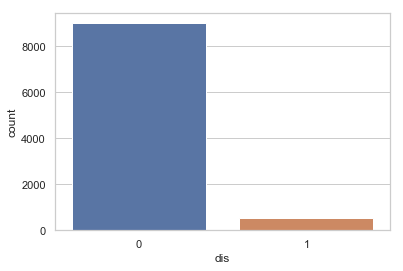

In [27]:
# If person is in a house with a disabled person

dis_1 = sns.countplot(x="dis", data = df_train)

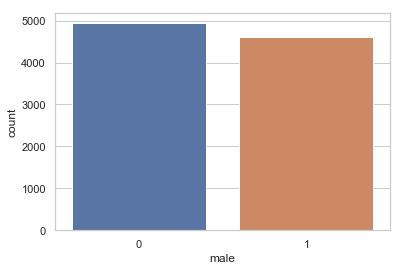

In [28]:
# The sex variables are inversely related (as can be expected by the current dataset's conditions)

# 1 if male

sex_1 = sns.countplot(x="male", data = df_train)

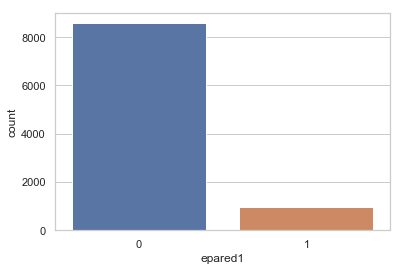

In [29]:
# Walls are bad or not in HH
# 1 if walls are bad

walls_1 = sns.countplot(x="epared1", data = df_train)

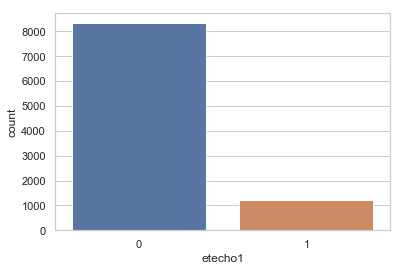

In [30]:
# Roof is bad or not in HH
# 1 if roof is bad

roof_1 = sns.countplot(x="etecho1", data = df_train)

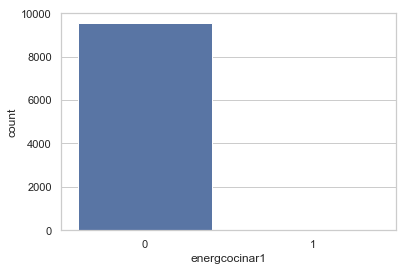

In [31]:
# =1 no main source of energy used for cooking (no kitchen)

kitchen_1 = sns.countplot(x="energcocinar1", data = df_train)

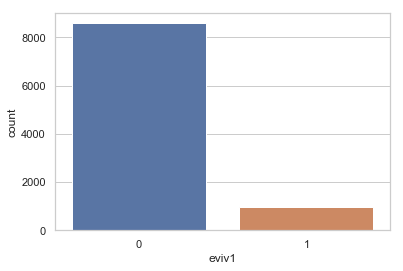

In [32]:
# =1 if floor are bad
floor_1 = sns.countplot(x="eviv1", data = df_train)

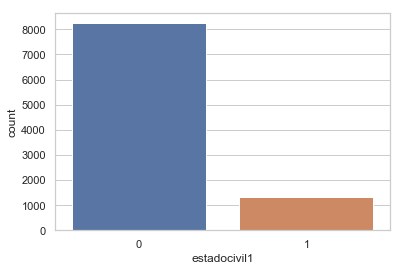

In [33]:
#estadocivil1, =1 if less than 10 years old

diez_1 = sns.countplot(x="estadocivil1", data = df_train)


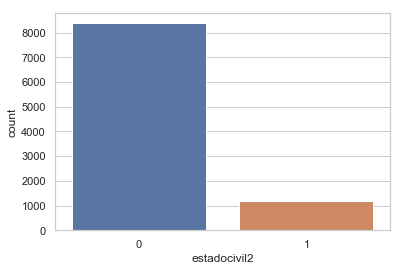

In [34]:
#estadocivil2, =1 if free or coupled union
diez_2 = sns.countplot(x="estadocivil2", data = df_train)


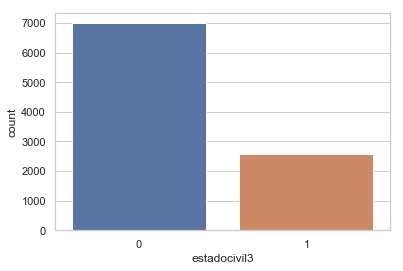

In [35]:
#estadocivil3, =1 if married
diez_3 = sns.countplot(x="estadocivil3", data = df_train)


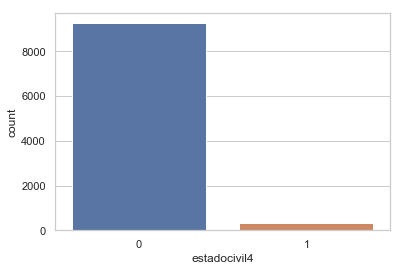

In [36]:
#estadocivil4, =1 if divorced
diez_4 = sns.countplot(x="estadocivil4", data = df_train)


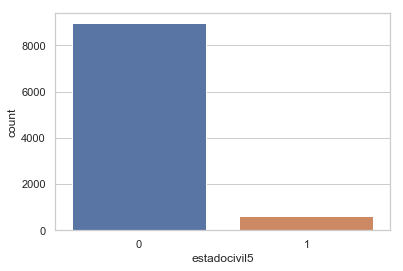

In [37]:
#estadocivil5, =1 if separated
diez_5 = sns.countplot(x="estadocivil5", data = df_train)


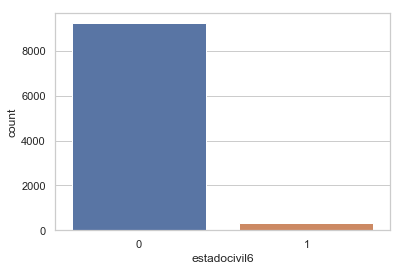

In [38]:
#estadocivil6, =1 if widow/er
diez_6 = sns.countplot(x="estadocivil6", data = df_train)


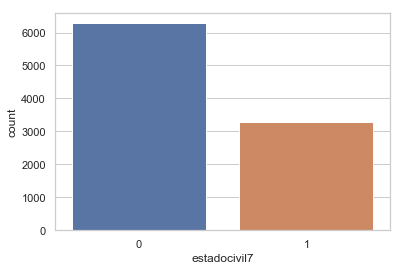

In [39]:
#estadocivil7, =1 if single
diez_7 = sns.countplot(x="estadocivil7", data = df_train)

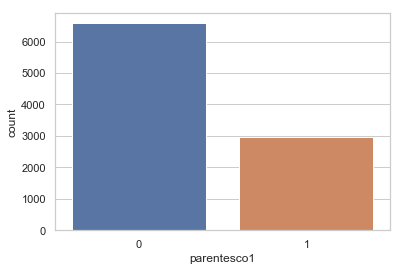

In [40]:
#Parents
pare_1 = sns.countplot(x="parentesco1", data = df_train)

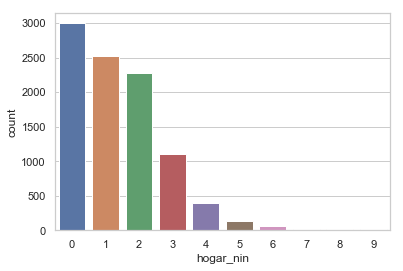

In [41]:
#hogar_nin, Number of children 0 to 19 in household
hogar_1 = sns.countplot(x="hogar_nin", data = df_train)

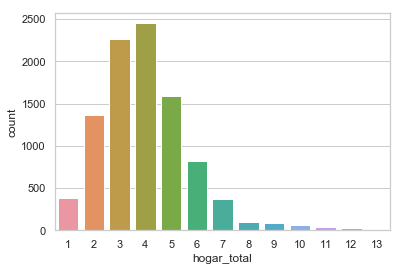

In [42]:
#hogar_total, # of total individuals in the household
hogar_2 = sns.countplot(x="hogar_total", data = df_train)

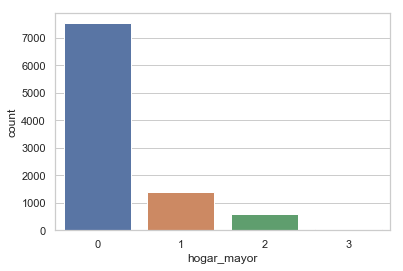

In [43]:
#hogar_mayor, # of individuals 65+ in the household
hogar_3 = sns.countplot(x="hogar_mayor", data = df_train)

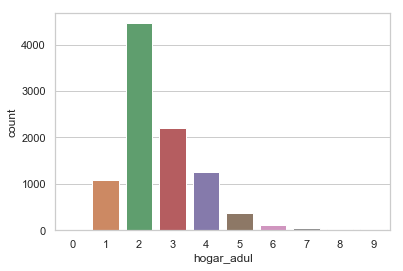

In [44]:
#hogar_adul, # of total adults in the household
hogar_4 = sns.countplot(x="hogar_adul", data = df_train)

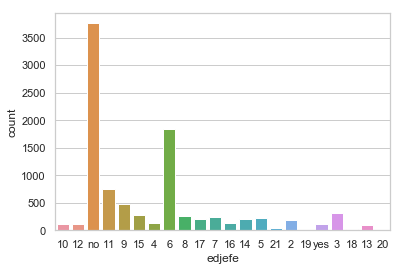

In [45]:
#edjefe

## the head of household education stat is interesting. It make sense to code it categorically. However, we must remember to treat it as such in analysis.

edjefe = sns.countplot(x="edjefe", data = df_train)

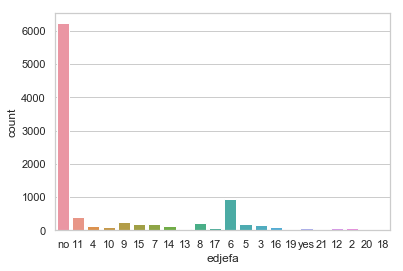

In [46]:
#edjefa

## the head of household education stat is interesting. It make sense to code it categorically. However, we must remember to treat it as such in analysis.
edjefa = sns.countplot(x="edjefa", data = df_train)

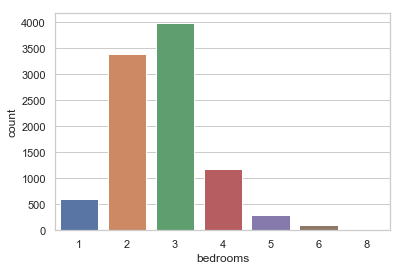

In [47]:
#bedrooms

beds_1 = sns.countplot(x="bedrooms", data=df_train)

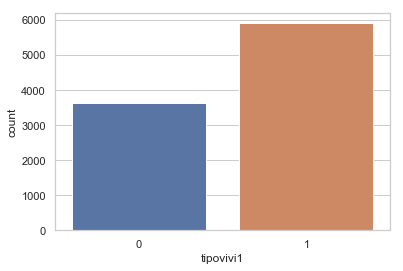

In [48]:
#tipovivi1, =1 own and fully paid house
tip_1 = sns.countplot(x="tipovivi1", data=df_train)

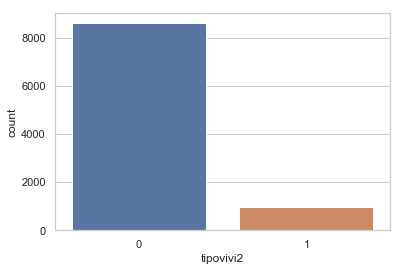

In [49]:
#tipovivi2, "=1 own, paying in installments"
tip_2 = sns.countplot(x="tipovivi2", data=df_train)

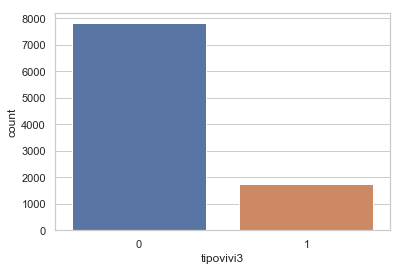

In [50]:
#tipovivi3, =1 rented
tip_3 = sns.countplot(x="tipovivi3", data=df_train)

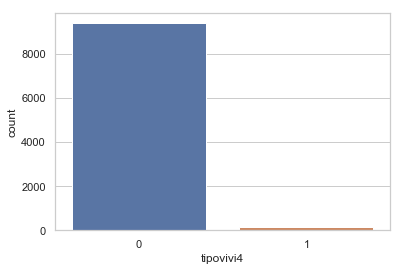

In [51]:
#tipovivi4, =1 precarious
tip_4 = sns.countplot(x="tipovivi4", data=df_train)

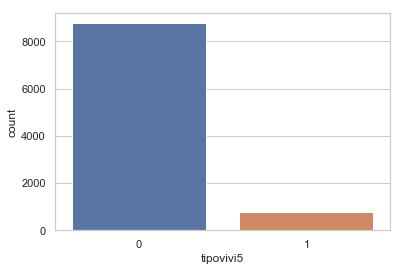

In [52]:
#tipovivi5, "=1 other(assigned, borrowed)"
tip_5 = sns.countplot(x="tipovivi5", data=df_train)

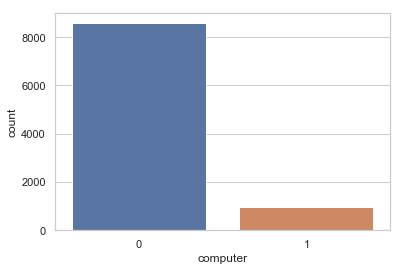

In [53]:
#Computer
comp_1 = sns.countplot(x="computer", data=df_train)

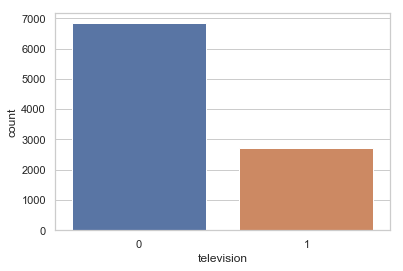

In [54]:
#Tv

tv_1 = sns.countplot(x="television", data=df_train)

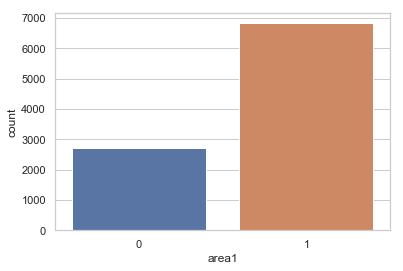

In [55]:
#Urban or rural

#1 = urban
zona_1 = sns.countplot(x="area1", data=df_train)

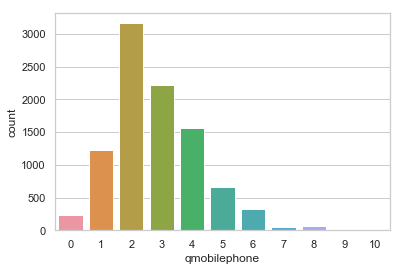

In [56]:
#Qmobilephone

phone_1 = sns.countplot(x="qmobilephone", data=df_train)

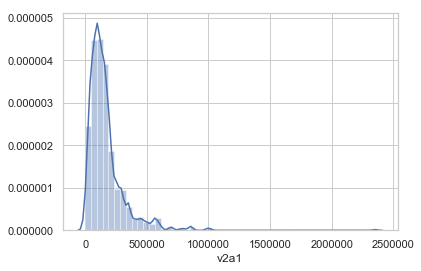

In [57]:
# Distributions

# Creating smaller dataframe that removes missing values so that we can use seaborn
df_1 = df_train[pd.notnull(df_train['v2a1'])]

sns.distplot(df_1.v2a1)

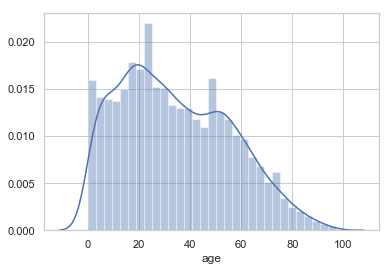

In [58]:
# Creating smaller dataframe that removes missing values so that we can use seaborn
df_2 = df_train[pd.notnull(df_train['age'])]

sns.distplot(df_2.age)

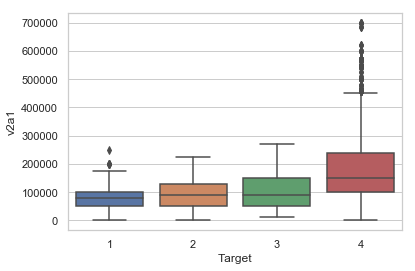

In [59]:
# Boxplots

#The outliers cause the scaling to function strangely. I'd like to have a clean look at what's going on at the lower incomes.
df_3 = df_train[df_train.v2a1 < 750000]

#Boxplot for income by target group with upper outliers removed
sns.boxplot(y="v2a1", x="Target", data=df_3)

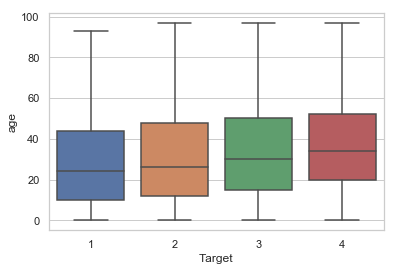

In [60]:
#Boxplot for age by target group with upper outliers removed
sns.boxplot(y="age", x="Target", data=df_train)

C:\Users\evang\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


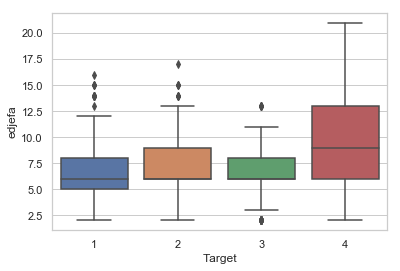

In [61]:
#Let's prepare some visualizations that make sense for the edjefe and edjefa variables

#For now, let's remove cases that have the "yes" or "no" responses
df_4 = df_train[df_train.edjefa != "yes"]
df_5 = df_4[df_4.edjefa != "no"]


#converting the edjefa column to int
df_5.edjefa= df_5.edjefa.astype(int)

sns.boxplot(y="edjefa", x="Target", data=df_5)

C:\Users\evang\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


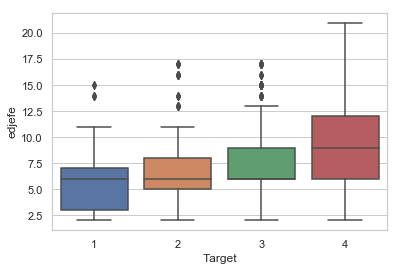

In [62]:
#Let's do the same thing for edjefe
df_6 = df_train[df_train.edjefe != "yes"]
df_7 = df_6[df_6.edjefe != "no"]

df_7.edjefe= df_7.edjefe.astype(int)

sns.boxplot(y="edjefe", x="Target", data=df_7)

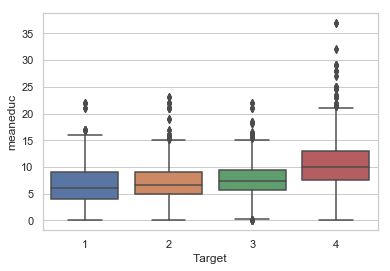

In [63]:

sns.boxplot(y="meaneduc", x="Target", data=df_train)

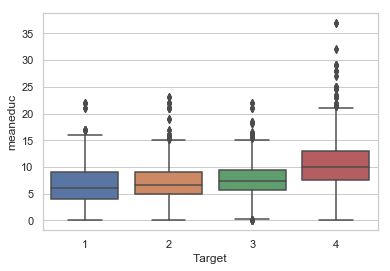

In [64]:
sns.boxplot(y="meaneduc", x="Target", data=df_train)

In [65]:
## Grouped barplots

# as evidenced by the visualizations below, the uneven sampling of target groups makes these representation tilted

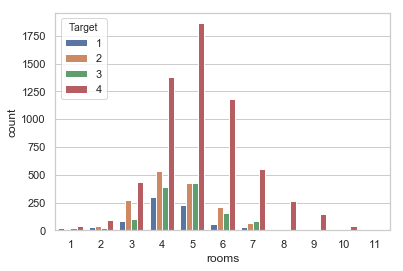

In [66]:
#Rooms

rom_2 = sns.countplot(x="rooms", hue="Target", data = df_train)


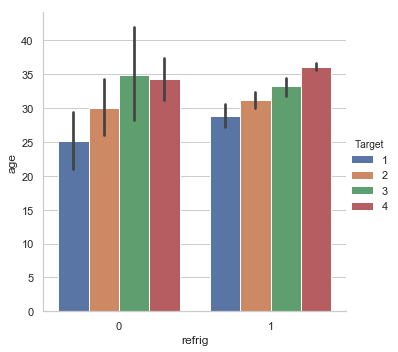

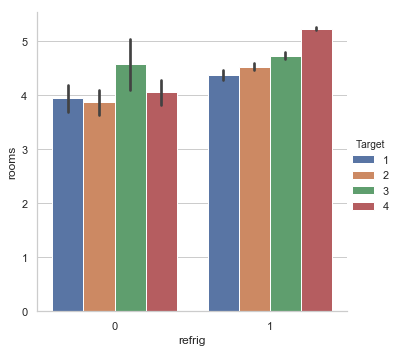

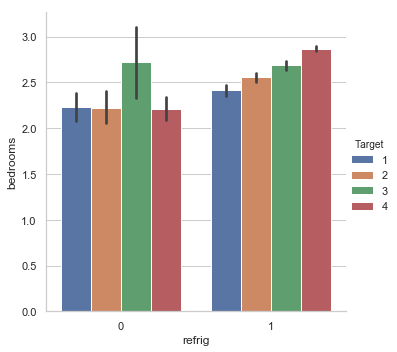

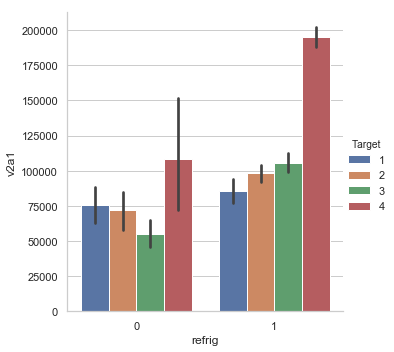

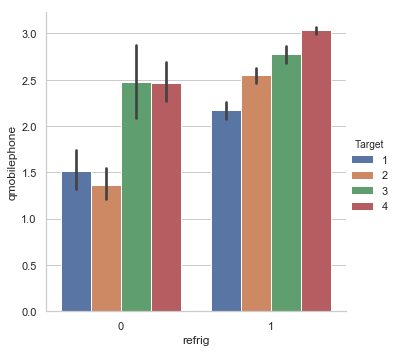

In [67]:
# Refrigerators by age
refrig_age = sns.catplot(x='refrig', y='age', hue='Target', data=df_train, kind="bar")

#Refrigertors by rooms in HH
refrig_rooms = sns.catplot(x='refrig', y='rooms', hue='Target', data=df_train, kind="bar")

#Refrigertors by bedrooms in HH
refrig_rooms = sns.catplot(x='refrig', y='bedrooms', hue='Target', data=df_train, kind="bar")

#Refrigertors by income
refrig_rooms = sns.catplot(x='refrig', y='v2a1', hue='Target', data=df_train, kind="bar")

#Refrigertors by # of mobile phones
refrig_rooms = sns.catplot(x='refrig', y='qmobilephone', hue='Target', data=df_train, kind="bar")

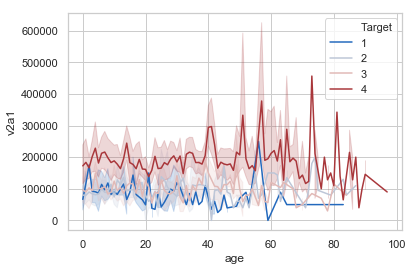

In [68]:
## Grouped lineplots

sns.lineplot(x="age", y="v2a1",
             hue="Target",
             data=df_train,
            palette='vlag')

## More will come. However, this should be a good start.